# Handling Missing Data:
In real-world datasets, missing data is a common challenge. Missing values can occur due to various reasons such as incorrect data entry, privacy concerns, or sensor malfunctions. How you handle these missing values can significantly impact the performance of your machine learning models.
# Understanding Missing Data

Missing data is typically represented as NaN (Not a Number) in Python. The first step in handling missing data is to identify the columns with missing values and decide how to address them.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Social_Network_Ads.xls")

# Display the first few rows of the dataset
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,19000.0,0.0
1,15810944.0,Male,35.0,20000.0,0.0
2,15668575.0,Female,26.0,43000.0,NaN
3,15603246.0,Female,27.0,57000.0,0.0
4,15804002.0,Male,19.0,76000.0,0.0


In [2]:

# Check for missing values
print(df.isnull().sum())


User ID             9
Gender              8
Age                30
EstimatedSalary    31
Purchased          18
dtype: int64


### Dropping Missing Data

One approach to handling missing data is to simply remove the rows or columns that contain NaN values. This is often the easiest method but can result in the loss of valuable information, especially if there are a lot of missing values.

#### Option 1: Drop Columns with Missing Values

If a column has too many missing values, it might be better to drop it entirely.



In [3]:
# Drop the 'EstimatedSalary' column due to missing values
df_copy = df.copy()
df_copy = df_copy.drop("EstimatedSalary", axis=1)

# Check if there are any missing values
print(df_copy.isnull().sum())


User ID       9
Gender        8
Age          30
Purchased    18
dtype: int64


#### Option 2: Drop Rows with Missing Values

You can also drop rows with any missing values in them.



In [4]:
# Drop rows where any column has missing values
df_copy = df.dropna()

# Check if any missing values remain
print(df_copy.isnull().sum())


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


## Imputing Missing Data with Simple Methods

When dropping data is not desirable, imputing (or filling in) missing values is a common approach. Imputation can be done using several strategies, such as using the mean, median, or a fixed value.

#### Option 3: Impute with a Constant Value

Sometimes, you may want to replace missing values with a constant, like a default value or a placeholder.

In [5]:
# Fill missing 'Age' values with a constant value, such as 30
df_copy = df.copy()
df_copy['Age'] = df_copy['Age'].fillna(30)

# Check if missing values remain
print(df_copy.isnull().sum())


User ID             9
Gender              8
Age                 0
EstimatedSalary    31
Purchased          18
dtype: int64


#### Option 4: Impute with the Mean (or Median) of the Column

For numerical features, filling missing values with the column’s mean is a common strategy.



In [6]:
# Calculate the mean of the 'Age' column
mean_age = df['EstimatedSalary'].mean()

# Fill missing 'Age' values with the mean
df_copy = df.copy()
df_copy['EstimatedSalary'] = df_copy['EstimatedSalary'].fillna(mean_age)

# Check if missing values remain
print(df_copy.isnull().sum())

User ID             9
Gender              8
Age                30
EstimatedSalary     0
Purchased          18
dtype: int64


You can also use the median instead of the mean to avoid the impact of outliers on the imputation.

In [7]:
# Calculate the mean of the 'Age' column
mean_age = df['EstimatedSalary'].median()

# Fill missing 'Age' values with the mean
df_copy = df.copy()
df_copy['EstimatedSalary'] = df_copy['EstimatedSalary'].fillna(mean_age)

# Check if missing values remain
print(df_copy.isnull().sum())

User ID             9
Gender              8
Age                30
EstimatedSalary     0
Purchased          18
dtype: int64


# Advanced Imputation Techniques

For more accurate imputation, particularly when the feature distribution is skewed, or when multiple features are related, you can apply more sophisticated techniques. Here are a few advanced strategies:


#### Option 5: K-Nearest Neighbors (KNN) Imputation

KNN can impute missing values based on the values of the nearest neighbors. This method works well when features are correlated.

In [8]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer with k=5 (using 5 nearest neighbors)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation to the dataset
df_copy = df.copy()
df_copy[['Age', 'EstimatedSalary']] = knn_imputer.fit_transform(df_copy[['Age', 'EstimatedSalary']])

# Check if missing values remain
print(df_copy.isnull().sum())


User ID             9
Gender              8
Age                 0
EstimatedSalary     0
Purchased          18
dtype: int64


#### Option 6: Multivariate Imputation by Chained Equations (MICE)

MICE performs multiple imputations using a regression model for each feature with missing values, iterating over all features in the dataset.

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the Iterative Imputer (MICE)
mice_imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply MICE imputation to the dataset
df_copy = df.copy()
df_copy[['Age', 'EstimatedSalary']] = mice_imputer.fit_transform(df_copy[['Age', 'EstimatedSalary']])

# Check if missing values remain
print(df_copy.isnull().sum())


User ID             9
Gender              8
Age                 0
EstimatedSalary     0
Purchased          18
dtype: int64


## Visualizing Missing Data

Visualizing missing data helps in understanding the pattern of missingness. This can help you decide whether to drop or impute the missing values based on the patterns observed.



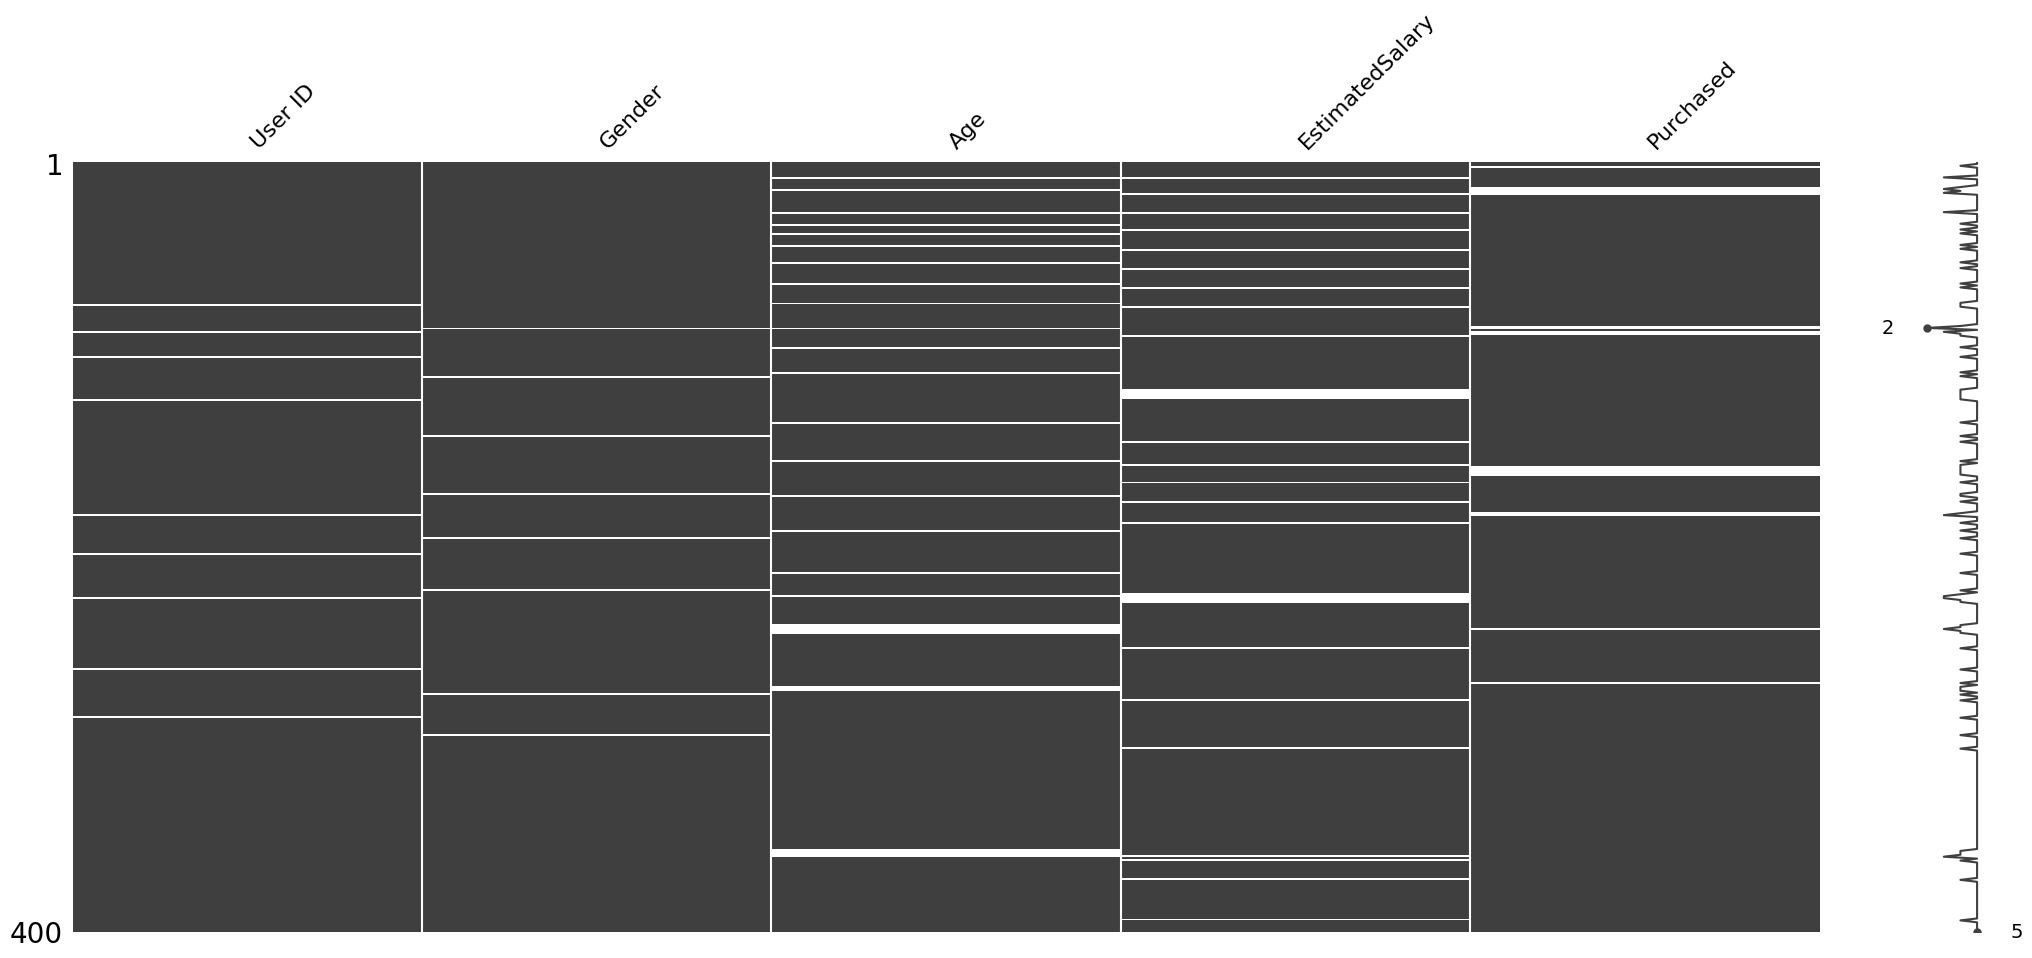

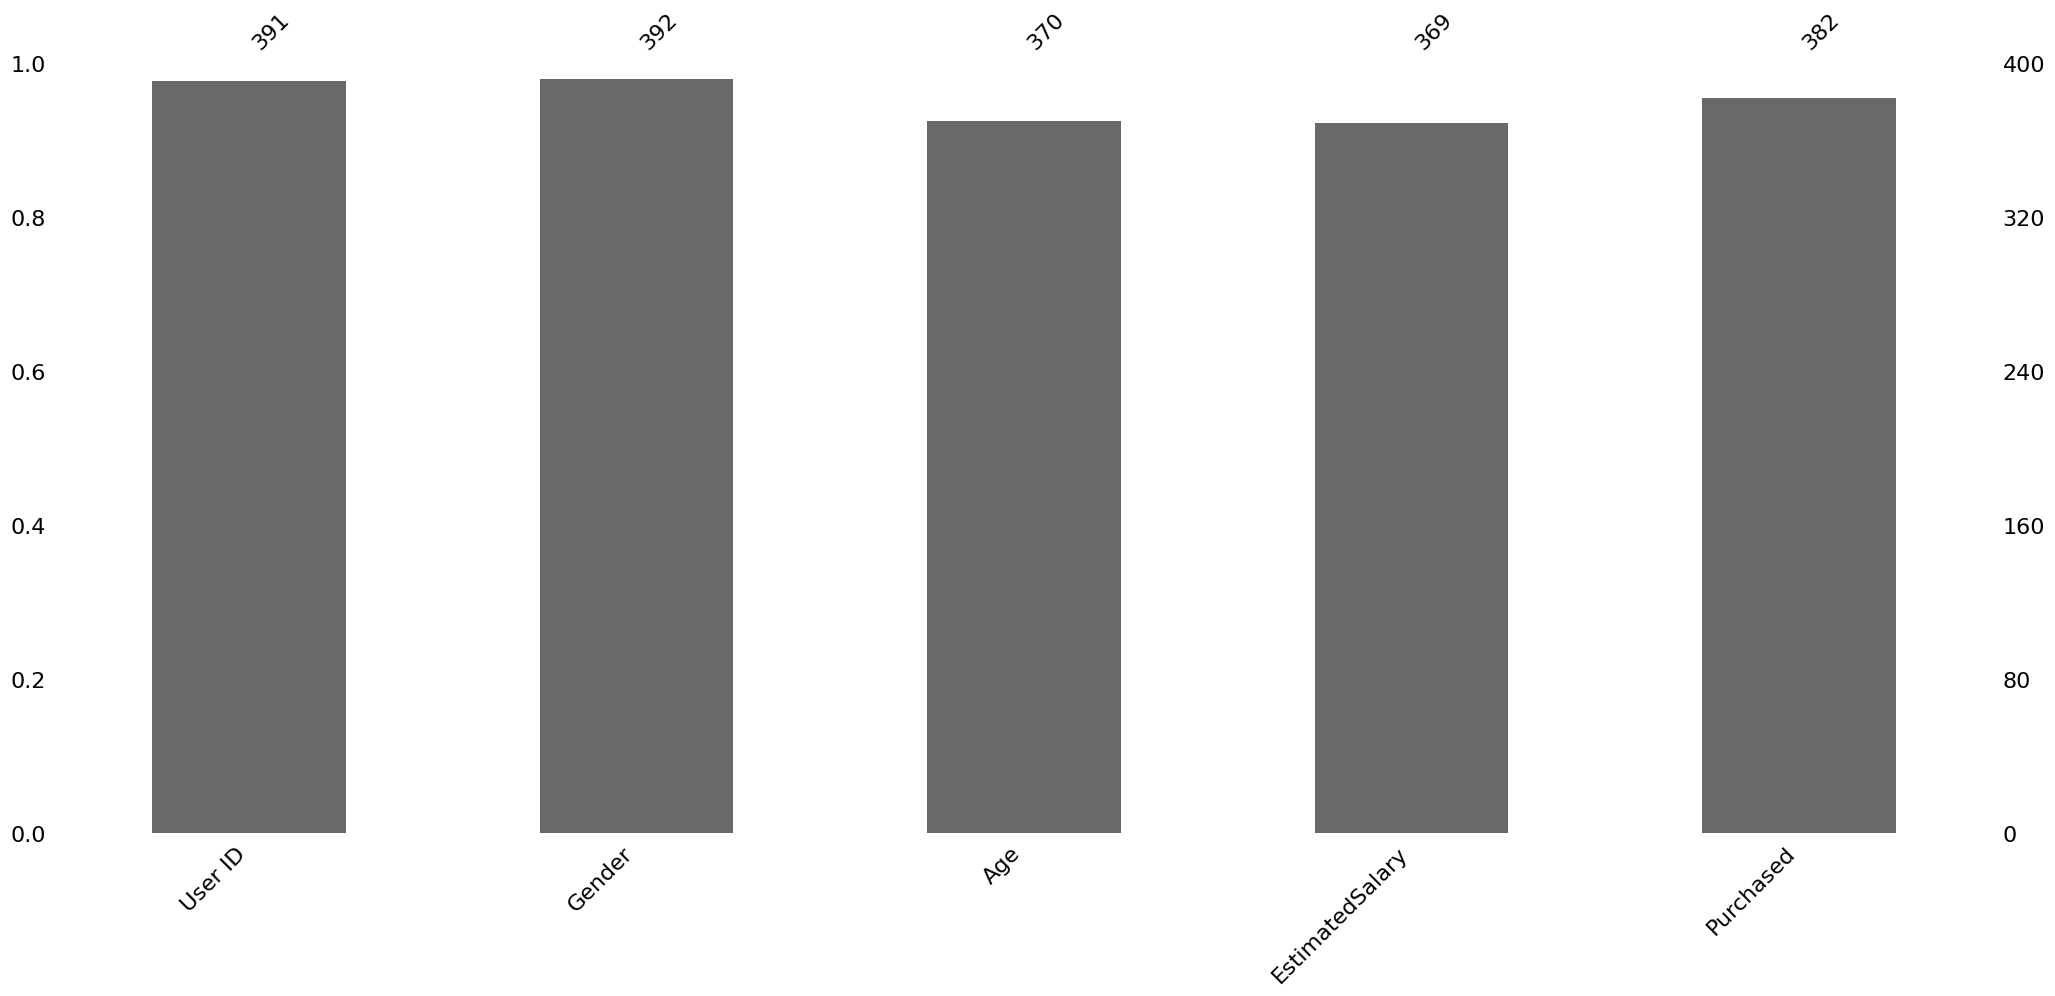

In [10]:
import missingno as msno

# Visualize missing data using a matrix plot
msno.matrix(df)
plt.show()

# Visualize missing data using a bar plot
msno.bar(df)
plt.show()


## Advanced Handling: Model-Based Imputation

In more complex scenarios, imputation can be treated as a machine learning problem itself. You can use algorithms like Random Forest or XGBoost to predict missing values based on other features in the dataset.

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder to encode 'Gender' column
label_encoder = LabelEncoder()

# Encode the 'Gender' column (Male -> 0, Female -> 1)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Now, the dataset is ready for machine learning models
# Train the model using rows without missing 'Age' values
train_data = df[df['Age'].notnull()]
X_train = train_data.drop('Age', axis=1)  # Features
y_train = train_data['Age']  # Target variable

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X_train, y_train)

# Predict missing 'Age' values using the trained model
missing_data = df[df['Age'].isnull()]
X_missing = missing_data.drop('Age', axis=1)

# Predict and fill in missing 'Age' values
df.loc[df['Age'].isnull(), 'Age'] = rf_model.predict(X_missing)

# Check if missing values remain
print(df.isnull().sum())


User ID             9
Gender              0
Age                 0
EstimatedSalary    31
Purchased          18
dtype: int64


---

### **Comparing the Approaches**
| **Method**                    | **When to Use**                                                             |
|-------------------------------|-----------------------------------------------------------------------------|
| **Dropping data (rows/columns)**| When data is missing in a small portion and doesn't impact analysis significantly. |
| **Imputation with Mean/Median**| When you want a simple, quick solution and the data is roughly symmetric.  |
| **KNN Imputation**             | When features are related, and you want more accurate imputations.          |
| **MICE (Multivariate Imputation)**| When data has complex relationships between features and missing values.  |
| **Model-Based Imputation**     | When you have large datasets and predictive models to accurately estimate missing values. |

---